In [1]:
import pymaid
import navis
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import seaborn as sns
import scipy.stats as stats

# connect your catmaid instance
instance=pymaid.CatmaidInstance('https://radagast.hms.harvard.edu/catmaidaedes',"<token>")

INFO  : Global CATMAID instance set. Caching is ON. (pymaid)


In [2]:
# fetch OSNs of interest
OSNs = pymaid.get_skids_by_annotation(['innervates MD1', 'left palp nerve', 'sensory neuron'], allow_partial = False, intersect = True)
neurons = pymaid.get_neuron(OSNs)

Fetch neurons:   0%|          | 0/45 [00:00<?, ?it/s]

Make nrn:   0%|          | 0/45 [00:00<?, ?it/s]

In [3]:
#empty list
ribbondistlist=list()

#shorten this function idk why
labels=pymaid.get_label_list()

for skelid in OSNs:
    n=pymaid.get_neuron(skelid)

    labels=pymaid.get_label_list()
    neuronlabels=labels[labels.skeleton_id==skelid]
    branchpoint=neuronlabels[neuronlabels.tag=='first branch point']

    ribbonsynapses=pymaid.get_connectors(n,tags='ribbon synapse',relation_type='presynaptic_to')

    if len(branchpoint) !=1:
        print('error, neuron skelid=%i does not  have exactly 1 branchpoint tag'% skelid) 
    else:
        bpnode=branchpoint.node_id.values[0]
        print('branchpoint id = %i' % bpnode)

    if len(ribbonsynapses) ==0:
        print('this neuron skelid=%i has no ribbon synapses' % skelid)
    else:
        ribbonnodes=ribbonsynapses.connector_id.values
        print(ribbonnodes)
        connectordetails=pymaid.get_connector_details(ribbonnodes)
        rb_ids=connectordetails.presynaptic_to_node.values
        print(rb_ids)
        for rb_id in rb_ids:
            #print(rb_id)
            distance=navis.dist_between(n,bpnode,rb_id)
            print(f'Distance between branchpoint and ribbon node on skeleton {skelid}:', distance)
            
            ribbondistlist.append(distance)

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


branchpoint id = 3154
[171377 188181 188654]


CN details:   0%|          | 0/3 [00:00<?, ?it/s]

INFO  : Data for 3 of 3 unique connector IDs retrieved (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


[55188 188182 3146]
Distance between branchpoint and ribbon node on skeleton 6788: 5160.257808685303
Distance between branchpoint and ribbon node on skeleton 6788: 1816.4647636413574
Distance between branchpoint and ribbon node on skeleton 6788: 1035.4139862060547


INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


branchpoint id = 199341
[194253]


CN details:   0%|          | 0/1 [00:00<?, ?it/s]

INFO  : Data for 1 of 1 unique connector IDs retrieved (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


[1021134]
Distance between branchpoint and ribbon node on skeleton 7172: 40340.3138923645


INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


branchpoint id = 156957
[1031978 1032088]


CN details:   0%|          | 0/2 [00:00<?, ?it/s]

INFO  : Data for 2 of 2 unique connector IDs retrieved (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


[67127 156958]
Distance between branchpoint and ribbon node on skeleton 7815: 88317.50467681885
Distance between branchpoint and ribbon node on skeleton 7815: 1116.7845458984375


INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


branchpoint id = 54106
[171800 190033]


CN details:   0%|          | 0/2 [00:00<?, ?it/s]

INFO  : Data for 2 of 2 unique connector IDs retrieved (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


[171801 190034]
Distance between branchpoint and ribbon node on skeleton 7050: 4914.484527587891
Distance between branchpoint and ribbon node on skeleton 7050: 11543.468505859375


INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


branchpoint id = 47409
[183366 186111]


CN details:   0%|          | 0/2 [00:00<?, ?it/s]

INFO  : Data for 2 of 2 unique connector IDs retrieved (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


[183367 186112]
Distance between branchpoint and ribbon node on skeleton 1291: 15140.729457855225
Distance between branchpoint and ribbon node on skeleton 1291: 23042.996578216553


INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


branchpoint id = 202113
[202112]


CN details:   0%|          | 0/1 [00:00<?, ?it/s]

INFO  : Data for 1 of 1 unique connector IDs retrieved (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


[202113]
Distance between branchpoint and ribbon node on skeleton 8970: 0.0


INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


branchpoint id = 5888
this neuron skelid=2716 has no ribbon synapses
branchpoint id = 6571
[ 182020 1054498]


CN details:   0%|          | 0/2 [00:00<?, ?it/s]

INFO  : Data for 2 of 2 unique connector IDs retrieved (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


[6585 1054499]
Distance between branchpoint and ribbon node on skeleton 797: 16725.224349975586
Distance between branchpoint and ribbon node on skeleton 797: 61232.8469619751


INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


branchpoint id = 27556
[1025518]


CN details:   0%|          | 0/1 [00:00<?, ?it/s]

INFO  : Data for 1 of 1 unique connector IDs retrieved (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


[1025516]
Distance between branchpoint and ribbon node on skeleton 5021: 73949.92582321167


INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


branchpoint id = 196254
[196332 197716]


CN details:   0%|          | 0/2 [00:00<?, ?it/s]

INFO  : Data for 2 of 2 unique connector IDs retrieved (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


[196333 1014654]
Distance between branchpoint and ribbon node on skeleton 671: 2984.32918548584
Distance between branchpoint and ribbon node on skeleton 671: 8279.600299835205


INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


branchpoint id = 6690
[985005]


CN details:   0%|          | 0/1 [00:00<?, ?it/s]

INFO  : Data for 1 of 1 unique connector IDs retrieved (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


[6693]
Distance between branchpoint and ribbon node on skeleton 802: 5787.413330078125


INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


branchpoint id = 57244
this neuron skelid=7095 has no ribbon synapses


INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


branchpoint id = 82565
[168580 180711]


CN details:   0%|          | 0/2 [00:00<?, ?it/s]

INFO  : Data for 2 of 2 unique connector IDs retrieved (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


[168581 3344]
Distance between branchpoint and ribbon node on skeleton 953: 16356.898853302002
Distance between branchpoint and ribbon node on skeleton 953: 14478.117588043213


INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


branchpoint id = 53614
[184189]


CN details:   0%|          | 0/1 [00:00<?, ?it/s]

INFO  : Data for 1 of 1 unique connector IDs retrieved (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


[184190]
Distance between branchpoint and ribbon node on skeleton 6969: 83435.63115310669


INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


branchpoint id = 1674
[461293]


CN details:   0%|          | 0/1 [00:00<?, ?it/s]

INFO  : Data for 1 of 1 unique connector IDs retrieved (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


[207402]
Distance between branchpoint and ribbon node on skeleton 324409: 3188.8887786865234


INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


branchpoint id = 78028
this neuron skelid=2877 has no ribbon synapses
branchpoint id = 28737
this neuron skelid=2365 has no ribbon synapses


INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


branchpoint id = 54145
[666688]


CN details:   0%|          | 0/1 [00:00<?, ?it/s]

INFO  : Data for 1 of 1 unique connector IDs retrieved (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


[666689]
Distance between branchpoint and ribbon node on skeleton 6975: 1579.4357299804688


INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


branchpoint id = 2691
this neuron skelid=6848 has no ribbon synapses


INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


branchpoint id = 58235
this neuron skelid=7101 has no ribbon synapses


INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


branchpoint id = 3306
[185645 185655]


CN details:   0%|          | 0/2 [00:00<?, ?it/s]

INFO  : Data for 2 of 2 unique connector IDs retrieved (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


[185646 185656]
Distance between branchpoint and ribbon node on skeleton 9030: 2831.4899253845215
Distance between branchpoint and ribbon node on skeleton 9030: 2295.256450653076


INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


branchpoint id = 90838
this neuron skelid=1608 has no ribbon synapses


INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


branchpoint id = 4870
[171381]


CN details:   0%|          | 0/1 [00:00<?, ?it/s]

INFO  : Data for 1 of 1 unique connector IDs retrieved (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


[168751]
Distance between branchpoint and ribbon node on skeleton 714: 61846.035499572754


INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


branchpoint id = 2981
this neuron skelid=7114 has no ribbon synapses
branchpoint id = 90760
[181573 197090]


CN details:   0%|          | 0/2 [00:00<?, ?it/s]

INFO  : Data for 2 of 2 unique connector IDs retrieved (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


[181574 197091]
Distance between branchpoint and ribbon node on skeleton 9035: 16323.488006591797
Distance between branchpoint and ribbon node on skeleton 9035: 17138.283935546875


INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


branchpoint id = 181900
[188178]


CN details:   0%|          | 0/1 [00:00<?, ?it/s]

INFO  : Data for 1 of 1 unique connector IDs retrieved (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


[198656]
Distance between branchpoint and ribbon node on skeleton 3920: 7905.926910400391


INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


branchpoint id = 4202
this neuron skelid=1105 has no ribbon synapses
branchpoint id = 49856
[172020]


CN details:   0%|          | 0/1 [00:00<?, ?it/s]

INFO  : Data for 1 of 1 unique connector IDs retrieved (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


[172021]
Distance between branchpoint and ribbon node on skeleton 6736: 1688.2948455810547


INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


branchpoint id = 80920
this neuron skelid=1491 has no ribbon synapses
branchpoint id = 203205
[280684]


CN details:   0%|          | 0/1 [00:00<?, ?it/s]

INFO  : Data for 1 of 1 unique connector IDs retrieved (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


[280685]
Distance between branchpoint and ribbon node on skeleton 7120: 8609.87484741211


INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


branchpoint id = 10586
this neuron skelid=52050 has no ribbon synapses


INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


branchpoint id = 48117
this neuron skelid=6743 has no ribbon synapses
branchpoint id = 152895
[186143]


CN details:   0%|          | 0/1 [00:00<?, ?it/s]

INFO  : Data for 1 of 1 unique connector IDs retrieved (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


[152925]
Distance between branchpoint and ribbon node on skeleton 7127: 221.29507446289062


INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


branchpoint id = 91154
this neuron skelid=9051 has no ribbon synapses


INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


branchpoint id = 44605
[182076]


CN details:   0%|          | 0/1 [00:00<?, ?it/s]

INFO  : Data for 1 of 1 unique connector IDs retrieved (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


[182077]
Distance between branchpoint and ribbon node on skeleton 6751: 36016.51383972168


INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


branchpoint id = 6996
[181588]


CN details:   0%|          | 0/1 [00:00<?, ?it/s]

INFO  : Data for 1 of 1 unique connector IDs retrieved (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


[181587]
Distance between branchpoint and ribbon node on skeleton 866: 64038.956115722656


INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


branchpoint id = 11532
[191018]


CN details:   0%|          | 0/1 [00:00<?, ?it/s]

INFO  : Data for 1 of 1 unique connector IDs retrieved (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


[11527]
Distance between branchpoint and ribbon node on skeleton 1762: 7950.359802246094


INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


branchpoint id = 7161
this neuron skelid=873 has no ribbon synapses
branchpoint id = 5753
this neuron skelid=746 has no ribbon synapses


INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


branchpoint id = 20835
[1043238]


CN details:   0%|          | 0/1 [00:00<?, ?it/s]

INFO  : Data for 1 of 1 unique connector IDs retrieved (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


[1043239]
Distance between branchpoint and ribbon node on skeleton 877: 58741.90085601807


INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


branchpoint id = 190994
[191261]


CN details:   0%|          | 0/1 [00:00<?, ?it/s]

INFO  : Data for 1 of 1 unique connector IDs retrieved (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


[191262]
Distance between branchpoint and ribbon node on skeleton 8429: 21971.95182800293


INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


branchpoint id = 193362
[170911 184219]


CN details:   0%|          | 0/2 [00:00<?, ?it/s]

INFO  : Data for 2 of 2 unique connector IDs retrieved (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


[170910 184220]
Distance between branchpoint and ribbon node on skeleton 881: 12559.902931213379
Distance between branchpoint and ribbon node on skeleton 881: 90904.44100189209


INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


branchpoint id = 88540
this neuron skelid=8434 has no ribbon synapses


INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


branchpoint id = 60974
this neuron skelid=7160 has no ribbon synapses


INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


branchpoint id = 6015
this neuron skelid=764 has no ribbon synapses


In [4]:
ribbondistlist
integer=1000
ribbondistmicrons=[x/1000 for x in ribbondistlist]
ribbondistmicrons

[5.160257808685302,
 1.8164647636413573,
 1.0354139862060547,
 40.3403138923645,
 88.31750467681884,
 1.1167845458984376,
 4.914484527587891,
 11.543468505859375,
 15.140729457855224,
 23.042996578216552,
 0.0,
 16.725224349975587,
 61.2328469619751,
 73.94992582321167,
 2.98432918548584,
 8.279600299835206,
 5.787413330078125,
 16.356898853302003,
 14.478117588043213,
 83.43563115310668,
 3.1888887786865237,
 1.5794357299804687,
 2.8314899253845214,
 2.2952564506530764,
 61.84603549957276,
 16.3234880065918,
 17.138283935546873,
 7.905926910400391,
 1.6882948455810547,
 8.60987484741211,
 0.22129507446289062,
 36.01651383972168,
 64.03895611572266,
 7.950359802246094,
 58.74190085601806,
 21.97195182800293,
 12.55990293121338,
 90.9044410018921]

In [5]:
#initialize an empty array
all_geo=np.array([])
#empty list
allgeo=[]

#loop through all the neurons you selected
for n in neurons:
    
    #get skeleton id
    skeletonid=n.skeleton_id
    skelid=int(skeletonid)

    #get labels
    labels = pymaid.get_label_list()
    neuronlabels=labels[labels.skeleton_id==skelid]

    #define first branch point
    branchpoint=neuronlabels[neuronlabels.tag=='first branch point']
    bpnode=branchpoint.node_id.values[0]

    #first, get the geodesic distance from the neuron's root to all other nodes
    all_dists=navis.geodesic_matrix(n, bpnode)

    #get connector nodes tagged 'ribbon synapse'
    ribbonsynapses=pymaid.get_connectors(n,tags='ribbon synapse',relation_type='presynaptic_to')

    #fetch all connector nodes
    allconnectors=pymaid.get_connectors(n,relation_type='presynaptic_to')

    #turn all connector id's into a set
    all_connector_ids = set(allconnectors.connector_id)

    #subset that to get all ribbon synapses and turn that into a set
    ribbonsynapses=pymaid.get_connectors(n,tags='ribbon synapse', relation_type = 'presynaptic_to')
    ribbon_connector_ids = set(ribbonsynapses.connector_id)

    #subset all synapses that are NOT ribbons, ie. t-bar connectors
    non_ribbon_connector_ids = all_connector_ids - ribbon_connector_ids

    #get treenodes presynaptic to t-bar connectors
    nonribbontreenodes=pymaid.get_connector_details(non_ribbon_connector_ids)
    nonribbonids=nonribbontreenodes.presynaptic_to_node.values

    #Subset distances from non-ribbon synapses to first branch point
    non_ribbon_dists = all_dists.loc[bpnode,nonribbonids].values
    #print(non_ribbon_dists)
    non_ribbon_dists=non_ribbon_dists.tolist()
    allgeo.append(non_ribbon_dists)

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


CN details:   0%|          | 0/229 [00:00<?, ?it/s]

INFO  : Data for 229 of 229 unique connector IDs retrieved (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


CN details:   0%|          | 0/504 [00:00<?, ?it/s]

INFO  : Data for 504 of 504 unique connector IDs retrieved (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


CN details:   0%|          | 0/489 [00:00<?, ?it/s]

INFO  : Data for 489 of 489 unique connector IDs retrieved (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


CN details:   0%|          | 0/333 [00:00<?, ?it/s]

INFO  : Data for 333 of 333 unique connector IDs retrieved (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


CN details:   0%|          | 0/284 [00:00<?, ?it/s]

INFO  : Data for 284 of 284 unique connector IDs retrieved (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


CN details:   0%|          | 0/161 [00:00<?, ?it/s]

INFO  : Data for 161 of 161 unique connector IDs retrieved (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


CN details:   0%|          | 0/301 [00:00<?, ?it/s]

INFO  : Data for 301 of 301 unique connector IDs retrieved (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


CN details:   0%|          | 0/199 [00:00<?, ?it/s]

INFO  : Data for 199 of 199 unique connector IDs retrieved (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


CN details:   0%|          | 0/235 [00:00<?, ?it/s]

INFO  : Data for 235 of 235 unique connector IDs retrieved (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


CN details:   0%|          | 0/488 [00:00<?, ?it/s]

INFO  : Data for 488 of 488 unique connector IDs retrieved (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


CN details:   0%|          | 0/360 [00:00<?, ?it/s]

INFO  : Data for 360 of 360 unique connector IDs retrieved (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


CN details:   0%|          | 0/241 [00:00<?, ?it/s]

INFO  : Data for 241 of 241 unique connector IDs retrieved (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


CN details:   0%|          | 0/481 [00:00<?, ?it/s]

INFO  : Data for 481 of 481 unique connector IDs retrieved (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


CN details:   0%|          | 0/301 [00:00<?, ?it/s]

INFO  : Data for 301 of 301 unique connector IDs retrieved (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


CN details:   0%|          | 0/488 [00:00<?, ?it/s]

INFO  : Data for 488 of 488 unique connector IDs retrieved (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


CN details:   0%|          | 0/338 [00:00<?, ?it/s]

INFO  : Data for 338 of 338 unique connector IDs retrieved (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


CN details:   0%|          | 0/184 [00:00<?, ?it/s]

INFO  : Data for 184 of 184 unique connector IDs retrieved (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


CN details:   0%|          | 0/434 [00:00<?, ?it/s]

INFO  : Data for 434 of 434 unique connector IDs retrieved (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


CN details:   0%|          | 0/324 [00:00<?, ?it/s]

INFO  : Data for 324 of 324 unique connector IDs retrieved (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


CN details:   0%|          | 0/278 [00:00<?, ?it/s]

INFO  : Data for 278 of 278 unique connector IDs retrieved (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


CN details:   0%|          | 0/181 [00:00<?, ?it/s]

INFO  : Data for 181 of 181 unique connector IDs retrieved (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


CN details:   0%|          | 0/327 [00:00<?, ?it/s]

INFO  : Data for 327 of 327 unique connector IDs retrieved (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


CN details:   0%|          | 0/225 [00:00<?, ?it/s]

INFO  : Data for 225 of 225 unique connector IDs retrieved (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


CN details:   0%|          | 0/282 [00:00<?, ?it/s]

INFO  : Data for 282 of 282 unique connector IDs retrieved (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


CN details:   0%|          | 0/254 [00:00<?, ?it/s]

INFO  : Data for 254 of 254 unique connector IDs retrieved (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


CN details:   0%|          | 0/246 [00:00<?, ?it/s]

INFO  : Data for 246 of 246 unique connector IDs retrieved (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


CN details:   0%|          | 0/168 [00:00<?, ?it/s]

INFO  : Data for 168 of 168 unique connector IDs retrieved (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


CN details:   0%|          | 0/407 [00:00<?, ?it/s]

INFO  : Data for 407 of 407 unique connector IDs retrieved (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


CN details:   0%|          | 0/315 [00:00<?, ?it/s]

INFO  : Data for 315 of 315 unique connector IDs retrieved (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


CN details:   0%|          | 0/313 [00:00<?, ?it/s]

INFO  : Data for 313 of 313 unique connector IDs retrieved (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


CN details:   0%|          | 0/313 [00:00<?, ?it/s]

INFO  : Data for 313 of 313 unique connector IDs retrieved (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


CN details:   0%|          | 0/332 [00:00<?, ?it/s]

INFO  : Data for 332 of 332 unique connector IDs retrieved (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


CN details:   0%|          | 0/261 [00:00<?, ?it/s]

INFO  : Data for 261 of 261 unique connector IDs retrieved (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


CN details:   0%|          | 0/236 [00:00<?, ?it/s]

INFO  : Data for 236 of 236 unique connector IDs retrieved (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


CN details:   0%|          | 0/103 [00:00<?, ?it/s]

INFO  : Data for 103 of 103 unique connector IDs retrieved (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


CN details:   0%|          | 0/193 [00:00<?, ?it/s]

INFO  : Data for 193 of 193 unique connector IDs retrieved (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


CN details:   0%|          | 0/196 [00:00<?, ?it/s]

INFO  : Data for 196 of 196 unique connector IDs retrieved (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


CN details:   0%|          | 0/427 [00:00<?, ?it/s]

INFO  : Data for 427 of 427 unique connector IDs retrieved (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


CN details:   0%|          | 0/225 [00:00<?, ?it/s]

INFO  : Data for 225 of 225 unique connector IDs retrieved (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


CN details:   0%|          | 0/225 [00:00<?, ?it/s]

INFO  : Data for 225 of 225 unique connector IDs retrieved (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


CN details:   0%|          | 0/197 [00:00<?, ?it/s]

INFO  : Data for 197 of 197 unique connector IDs retrieved (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


CN details:   0%|          | 0/463 [00:00<?, ?it/s]

INFO  : Data for 463 of 463 unique connector IDs retrieved (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


CN details:   0%|          | 0/276 [00:00<?, ?it/s]

INFO  : Data for 276 of 276 unique connector IDs retrieved (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


CN details:   0%|          | 0/248 [00:00<?, ?it/s]

INFO  : Data for 248 of 248 unique connector IDs retrieved (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


CN details:   0%|          | 0/248 [00:00<?, ?it/s]

INFO  : Data for 248 of 248 unique connector IDs retrieved (pymaid)


In [6]:
allgeoflat=[item for sublist in allgeo for item in sublist]
all_geo_microns=[x/integer for x in allgeoflat]

findfont: Font family ['Liberation Sans'] not found. Falling back to DejaVu Sans.


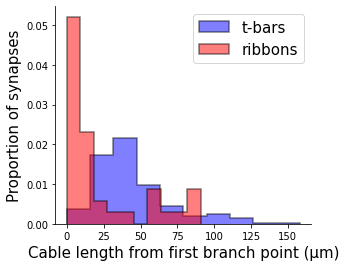

In [7]:
#Histogram

fig, ax = plt.subplots()
ax.hist(all_geo_microns, density=True, stacked=True, histtype='step', fill='True', color='blue', ec='black', alpha=0.5, label= 't-bars', linewidth=1.5)
ax.hist(ribbondistmicrons, density=True, stacked=True, histtype='step', fill='True', color='red', ec= 'black', alpha=0.5, label = 'ribbons', linewidth=1.5)
plt.xlabel('Cable length from first branch point (µm)', size=15, fontname="Liberation Sans")
plt.ylabel('Proportion of synapses', size=15, fontname="Liberation Sans")
font = font_manager.FontProperties(family='Liberation Sans', style='normal', size=15)
plt.gca().set_aspect(2700)
plt.legend(prop=font)
#ax.set_xlim(0,170)
#ax.set_aspect=0.01
sns.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)
plt.tick_params(axis='x', which='both', bottom=True, top=False)
plt.tick_params(axis='y', which='both', left=True, right=False)

plt.savefig('../svg/geodesicdistancefirstbranch.svg', format="svg")
plt.show()

In [8]:
stats.mannwhitneyu(all_geo_microns, ribbondistmicrons)

MannwhitneyuResult(statistic=390469.0, pvalue=6.775382054388135e-09)